### 190423H - NUSHATH MNM


# EN2550: Assignment 03 on Object Counting on a Conveyor Belt

## Connected Component Analysis

In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

#### 1. Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

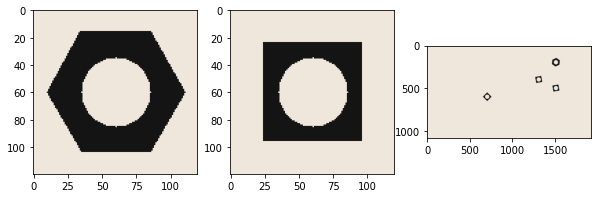

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3, figsize = (10, 5))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

#### 2. Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images.

Threshold for hex nut =  20.0
Threshold for Square nut =  20.0
Threshold for Conveyor belt =  20.0


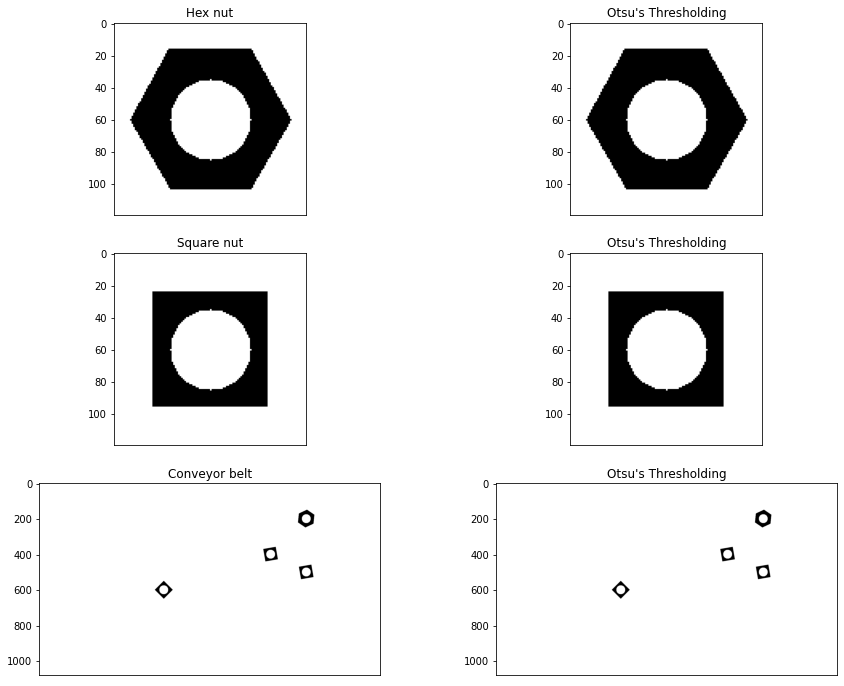

In [2]:
hexnut_template_gray = cv.imread('hexnut_template.png', cv.IMREAD_GRAYSCALE)
squarenut_template_gray =  cv.imread('squarenut_template.png', cv.IMREAD_GRAYSCALE)
conveyor_f100_gray =  cv.imread('conveyor_f100.png', cv.IMREAD_GRAYSCALE)

# Otsu's thresholding
ret1, hexnut_template_th = cv.threshold(hexnut_template_gray, 0,255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2, squarenut_template_th = cv.threshold(squarenut_template_gray, 0,255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3, conveyor_f100_th = cv.threshold(conveyor_f100_gray, 0,255, cv.THRESH_BINARY+cv.THRESH_OTSU)

print("Threshold for hex nut = ", ret1)
print("Threshold for Square nut = ", ret2)
print("Threshold for Conveyor belt = ", ret3)

images = [hexnut_template_gray, 0, hexnut_template_th, 
          squarenut_template_gray, 0, squarenut_template_th,
          conveyor_f100_gray, 0, conveyor_f100_th]

titles = ['Hex nut', 'Histogram', "Otsu's Thresholding",
          'Square nut', 'Histogram', "Otsu's Thresholding",
          'Conveyor belt', 'Histogram', "Otsu's Thresholding"]


fig, ax = plt.subplots(3, 2, figsize = (15, 12))

for i in range(3):
    ax[i][0].imshow(images[i*3], 'gray')
    ax[i][0].set_title(titles[i*3]), ax[i][0].set_xticks([])
    

    ax[i][1].imshow(images[i*3+2], 'gray')
    ax[i][1].set_title(titles[i*3+2]), ax[i][1].set_xticks([])
   

plt.show()


#### 3. Carry out morphological closing to remove small holes inside the foreground. Use a $3 \times 3$ kernel.

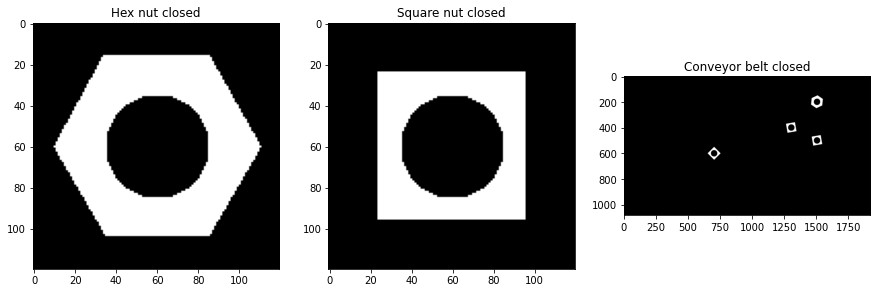

In [3]:
kernel = np.ones((3,3),np.uint8)

hexnut_template_inv = np.invert(hexnut_template_th)
squarenut_template_inv = np.invert(squarenut_template_th)
conveyor_f100_inv = np.invert(conveyor_f100_th)

closed_hexnut_template = cv.morphologyEx(hexnut_template_inv, cv.MORPH_CLOSE, kernel)
closed_squarenut_template = cv.morphologyEx(squarenut_template_inv, cv.MORPH_CLOSE, kernel)
closed_conveyor_belt = cv.morphologyEx(conveyor_f100_inv, cv.MORPH_CLOSE, kernel)



fig, ax = plt.subplots(1,3,figsize =(15,10))


ax[0].imshow(closed_hexnut_template,'gray')
ax[0].set_title('Hex nut closed')

ax[1].imshow(closed_squarenut_template,'gray')
ax[1].set_title('Square nut closed')

ax[2].imshow(closed_conveyor_belt,'gray')
ax[2].set_title('Conveyor belt closed')

plt.show()

#### 4. Connected components analysis: apply the connectedComponentsWithStats function and display the outputs as colormapped images.

In [4]:
connectivity = 8

hexnut_connected = cv.connectedComponentsWithStats(closed_hexnut_template,connectivity, cv.CV_32S)
numLabels_hex = hexnut_connected[0] 
labels_hex = hexnut_connected[1]
stats_hex = hexnut_connected[2]
centroids_hex = hexnut_connected[3]

squarenut_connected = cv.connectedComponentsWithStats(closed_squarenut_template, connectivity, cv.CV_32S)
numLabels_square = squarenut_connected[0]
labels_square = squarenut_connected[1]
stats_square = squarenut_connected[2]
centroids_square = squarenut_connected[3] 

conveyor_connected = cv.connectedComponentsWithStats(closed_conveyor_belt,connectivity, cv.CV_32S)
numLabels_conv = conveyor_connected[0]
labels_conv = conveyor_connected[1]
stats_conv = conveyor_connected[2]
centroids_conv = conveyor_connected[3]

**** How many connected components are detected in each image? ****

In [5]:
# substract the background components

print("No. of connected components in hexnut template = ", (numLabels_hex-1) ) # hexnut template
print("No. of connected components in square template = ", (numLabels_square-1) ) # squarenut template
print("No. of connected components in conveyor belt image = ", (numLabels_conv-1) ) # conveyor belt image

No. of connected components in hexnut template =  1
No. of connected components in square template =  1
No. of connected components in conveyor belt image =  4


**** What are the statistics? ****

*** stats is an array contains 5 stats of each components. ***</br>
1. Leftmost (x) coordinate.
2. Topmost (y) coordinate.
3. The horizontal size of the bounding box
4. The vertical size of the bounding box
5. The total pixel area of the connected component ***

In [6]:
# hexnut template
# first components is background 

x = stats_hex[1, cv.CC_STAT_LEFT]
y = stats_hex[1, cv.CC_STAT_TOP]
H = stats_hex[1, cv.CC_STAT_WIDTH]
V = stats_hex[1, cv.CC_STAT_HEIGHT]
area = stats_hex[1, cv.CC_STAT_AREA]

x, y, H, V, area


(10, 16, 101, 88, 4728)

*** For the hexnut template object area (in pixel) = 4728 ***

In [7]:
# squarenut template
# first components is background 

x = stats_square[1, cv.CC_STAT_LEFT]
y = stats_square[1, cv.CC_STAT_TOP]
H = stats_square[1, cv.CC_STAT_WIDTH]
V = stats_square[1, cv.CC_STAT_HEIGHT]
area = stats_square[1, cv.CC_STAT_AREA]

x, y, H, V, area

(24, 24, 72, 72, 3227)

In [8]:
# conveyor belt image

for i in range(numLabels_conv):
    if(i==0):                    # first components is background 
        continue
    x = stats_conv[i, cv.CC_STAT_LEFT]
    y = stats_conv[i, cv.CC_STAT_TOP]
    H = stats_conv[i, cv.CC_STAT_WIDTH]
    V = stats_conv[i, cv.CC_STAT_HEIGHT]
    area = stats_conv[i, cv.CC_STAT_AREA]

    print(stats_conv[i])

[1454  150   92  100 4636]
[1259  359   82   82 3087]
[1459  459   82   82 3087]
[ 650  550  101  101 3144]


**** What are the centroids? ****

*** The coordinates of the center of the bounding boxes are known as centroids. ***

In [9]:
# first connected component is background

print("coordinates of centroid connected components in hexnut template = ", (centroids_hex[1]) ) # hexnut template
print("coordinates of centroid connected components in squarenut template = ", (centroids_square[1]) ) # squarenut template

 # conveyor belt image 
print("coordinates of centroid connected components in  conveyor belt image = ", (list(centroids_conv[1:]))) # 4 connected components

coordinates of centroid connected components in hexnut template =  [59.83375635 59.22356176]
coordinates of centroid connected components in squarenut template =  [59.19677719 59.19677719]
coordinates of centroid connected components in  conveyor belt image =  [array([1499.24201898,  199.28515962]), array([1299.18302559,  399.18302559]), array([1499.18302559,  499.18302559]), array([700., 600.])]


#### 5. Contour analysis: Use findContours function to retrieve the extreme outer contours. 

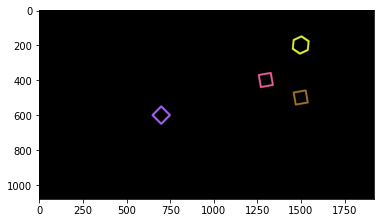

In [10]:
import random

background_img = np.zeros((1080,1920,3),dtype=np.uint8)
contours, hierarchy = cv.findContours(conveyor_f100_inv, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    color = (random.randint(0,256), random.randint(0,256), random.randint(0,256)) 
    cv.drawContours(background_img, contours, i, color,10, cv.LINE_8, hierarchy,0)


plt.imshow(cv.cvtColor(background_img,cv.COLOR_RGB2BGR))

## Detecting Objects on a Synthetic Conveyor

In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.

#### 1. Open the sequence and play it

*** while playing appending every frame to a frame_array ***

In [11]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []   
frame_array = []     # extra list for append every frame

while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    
    frame_array.append(frame)
    f += 1
    # text = 'Frame:' + str(f)
    # cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    # cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


#### 2. Count the number of matching hexagonal nuts in conveyor_f100.png.

*** Function   countShape(convayer_contours,shape_countour)   will take the input as the image countour and the shape countour and return the no. of shapes in the image ***

In [12]:
def countShape(convayer_contours, shape_countour):
    count = 0
    for i in range(len(shape_countour)):
        for j in range(len(convayer_contours)):
            ret = cv.matchShapes(convayer_contours[j],shape_countour[i],1,0.0)
            if ret < 0.01:
                count +=1
    return count

In [13]:
contours, hierarchy = cv.findContours(conveyor_f100_inv, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
hexnut_contours, h1 = cv.findContours(hexnut_template_inv, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
squarenut_contours, h2 = cv.findContours(squarenut_template_inv, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

matching_hex = countShape(contours, hexnut_contours)
print('No. of matching hexogonal nuts in conveyor_f100: ', matching_hex)

No. of matching hexogonal nuts in conveyor_f100:  1


#### 3. Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. 

In [14]:
shape = (1080, 1920, 3)

total_count = 0
pre_count = 0

hex_count_out = 0
hex_count_pre = 0


for i in range(len(frame_array)):
    gray_frame = cv.cvtColor(frame_array[i], cv.COLOR_BGR2GRAY)
    thresh_frame , frame_th = cv.threshold(gray_frame,0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)
    frame_inv = np.invert(frame_th)
   
    frame_contours, h3 = cv.findContours(frame_inv, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    hex_count = countShape(frame_contours, hexnut_contours)  # instantaneous count of hexagon nuts
    if hex_count>hex_count_pre:
        hex_count_out += (hex_count-hex_count_pre)  # total accumulation of the hexagon nuts
    hex_count_pre = hex_count

    square_count = countShape(frame_contours, squarenut_contours)  # instantaneous count of square nuts
    

    count = hex_count + square_count  # instantaneous count of all objects   

    if count>pre_count:
        total_count += (count-pre_count)  # total accumulation of all objects 
    pre_count = count
    
    square_count_out = total_count - hex_count_out  # total accumulation of the square nuts (total objects - total hexagon objects)


    text1 = 'Hex count :' + str(hex_count_out) + '   Square count :' + str(square_count_out) + '     Total count :' + str(total_count)
    cv.putText(frame_array[i],text1 , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)

out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

print("No. of hexagon nuts found: ", hex_count_out)
print("No. of square nuts found: ", square_count_out)
print("No. of objects found: ", total_count)

No. of hexagon nuts found:  4
No. of square nuts found:  4
No. of objects found:  8
